In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels 

In [2]:
data = pd.read_excel('s_21.xlsx')

In [3]:
data

,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2036-11-01,2036-12-01,2037-01-01,2037-02-01,2037-03-01,2037-04-01,2037-05-01,2037-06-01,2037-07-01,2037-08-01
0,22.05,23.1,15.5184,20.4189,5.0024,23.0475,31.3686,20.0626,21.6291,40.9808,...,198.5424,207.8847,216.0288,220.8935,220.6971,212.9438,220.6978,212.3859,225.6948,234.2582


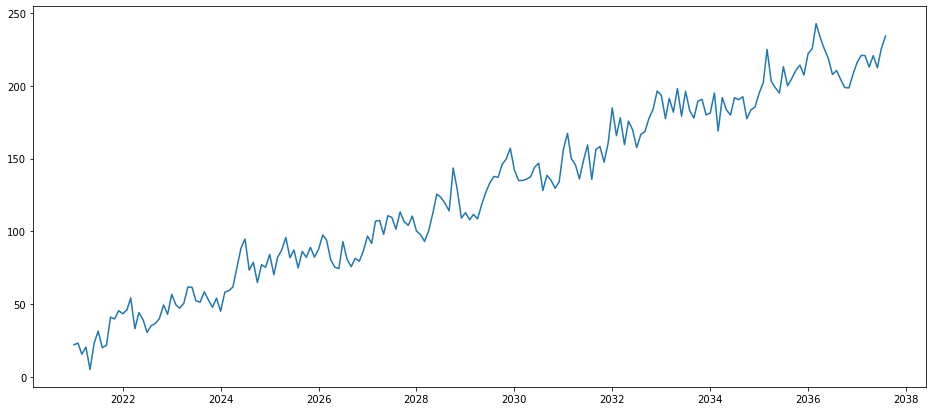

In [4]:
plt.figure(figsize=(16, 7))
plt.plot(data.iloc[0])

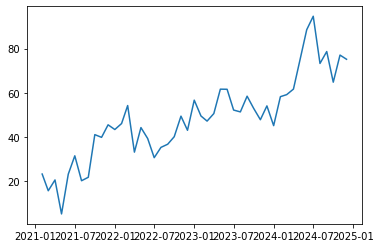

In [5]:
plt.plot(data.iloc[0][1:48])

Тренд растущий, и линеарный на первый взгляд. Сезоной части как-то нет

In [7]:
test = statsmodels.tsa.stattools.adfuller(data.iloc[0])

In [9]:
test[0]

-0.6712898866424546

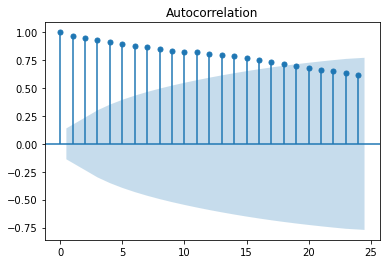

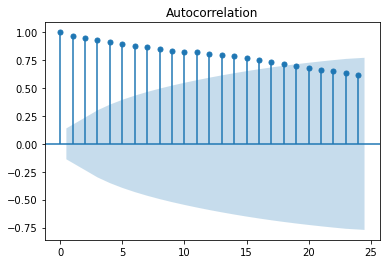

In [10]:
plot_acf(data.iloc[0])

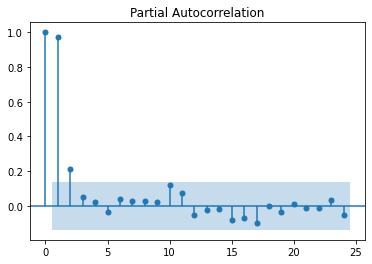

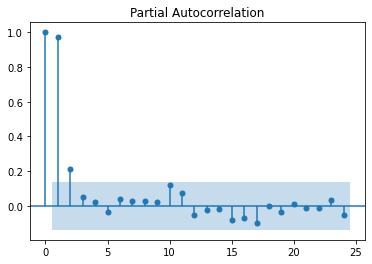

In [11]:
plot_pacf(data.iloc[0])

In [12]:
n = len(data.iloc[0])
t = np.arange(1,n+1)

In [13]:
t

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [14]:
a = ( n * np.sum( t * data.iloc[0]) - np.sum(t) * np.sum(data.iloc[0]) )/ ( n * np.sum( t**2) - np.sum(t) **2 )

In [15]:
b = ( np.sum(data.iloc[0] ) * np.sum( t**2 ) - np.sum( t ) * np.sum( t * data.iloc[0])  )/( n * np.sum( t**2 ) - np.sum(t) **2 )

In [16]:
a

1.0400190657766442

In [17]:
b

22.02936488944723

In [18]:
f = a*t + b


In [19]:
data_withot_trend = data.iloc[0] - f

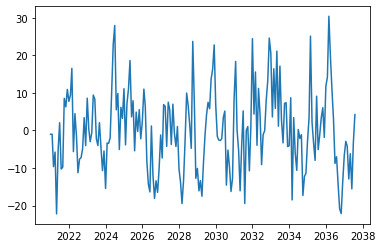

In [20]:
plt.plot(data_withot_trend)

In [21]:
d = 12


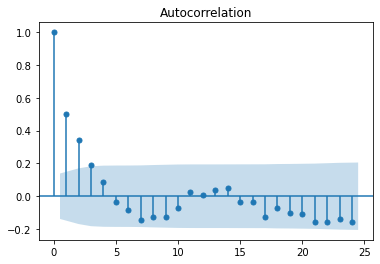

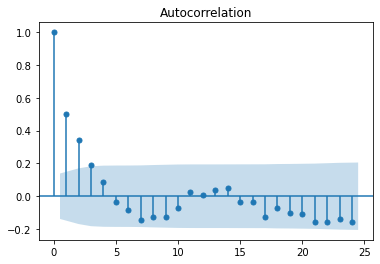

In [22]:
plot_acf(data_withot_trend)


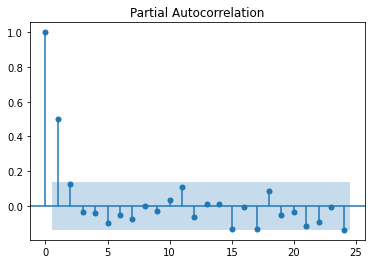

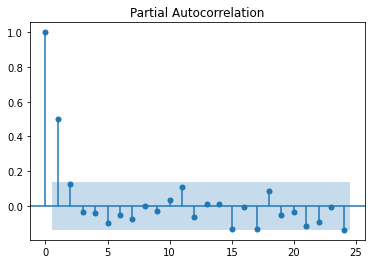

In [23]:
plot_pacf(data_withot_trend)

ACF два (или 3 вопрос тут) не в трубе. PACF один остался  

AR(1), AR(2) ARMA(1,2), ARMA(1,3), ARMA(2,2), ARMA(2,3)

In [24]:
 std_of_residual = np.std(data_withot_trend)

In [25]:
var_of_res = np.var(data_withot_trend)
var_of_res

111.90716636798987

In [26]:
models = ['AR(1)', 'AR(2)' , 'ARMA(1,2)', 'ARMA(1,3)', 'ARMA(2,2)', 'ARMA(2,3)']
model_dict_AIC = {}

In [27]:
model_dict_AIC[models[0]] = np.log(var_of_res) + 2 * ( 1 +  0 ) / n 
model_dict_AIC[models[1]] = np.log(var_of_res) + 2 * ( 2 +  0 ) / n 
model_dict_AIC[models[2]] = np.log(var_of_res) + 2 * ( 1 +  2 ) / n 
model_dict_AIC[models[3]] = np.log(var_of_res) + 2 * ( 1 +  3 ) / n 
model_dict_AIC[models[4]] = np.log(var_of_res) + 2 * ( 2 +  2 ) / n
model_dict_AIC[models[5]] = np.log(var_of_res) + 2 * ( 2 +  3 ) / n 

In [28]:
model_dict_BIC = {}

In [29]:
model_dict_BIC[models[0]] = np.log(var_of_res) +  ( 1 +  0 ) * np.log( n ) / n 
model_dict_BIC[models[1]] = np.log(var_of_res) +  ( 2 +  0 ) * np.log( n ) / n
model_dict_BIC[models[2]] = np.log(var_of_res) +  ( 1 +  2 ) * np.log( n ) / n
model_dict_BIC[models[3]] = np.log(var_of_res) +  ( 1 +  3 ) * np.log( n ) / n
model_dict_BIC[models[4]] = np.log(var_of_res) +  ( 2 +  2 ) * np.log( n ) / n
model_dict_BIC[models[5]] = np.log(var_of_res) +  ( 2 +  3 ) * np.log( n ) / n

In [30]:
model_dict_BIC

{'AR(1)': 4.744161242709361,
 'AR(2)': 4.770652829542102,
 'ARMA(1,2)': 4.797144416374842,
 'ARMA(1,3)': 4.823636003207582,
 'ARMA(2,2)': 4.823636003207582,
 'ARMA(2,3)': 4.850127590040322}

In [31]:
pd.DataFrame( [model_dict_AIC, model_dict_BIC], index = ['AIC', 'BIC'] )

,AR(1),AR(2),"ARMA(1,2)","ARMA(1,3)","ARMA(2,2)","ARMA(2,3)"
AIC,4.727670,4.737670,4.747670,4.757670,4.757670,4.767670
BIC,4.744161,4.770653,4.797144,4.823636,4.823636,4.850128


Выбираю AR(1)

In [32]:
statsmodels.tsa.stattools.acf(data_withot_trend)

C:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.50057072,  0.34517175,  0.18760895,  0.08398444,
       -0.0323754 , -0.08552167, -0.1452757 , -0.12783894, -0.12811347,
       -0.07109033,  0.02674841,  0.00500151,  0.03587534,  0.05079497,
       -0.03505391, -0.03776415, -0.12893088, -0.06971492, -0.10520209,
       -0.10619289, -0.15940678, -0.15570003, -0.13988145, -0.15586628,
       -0.12276228, -0.06244987,  0.07257901,  0.1481388 ,  0.10885026,
        0.15460123,  0.14262694,  0.15639252,  0.05702433,  0.02929006,
       -0.03381446,  0.02840287,  0.0208863 ,  0.03291007,  0.04930189,
        0.00368213])

In [33]:
alfa = 0.50 

In [34]:
epsilon = np.zeros(n)
epsilon[0] = data_withot_trend[0]
for i in range(1,n):
    epsilon[i] = data_withot_trend[i] - data_withot_trend[i-1] * alfa
    
epsilon[n-1] = data_withot_trend[n-1] - data_withot_trend[n-2] * alfa

In [35]:
type(data_withot_trend)

pandas.core.series.Series

In [36]:
len(epsilon)

200

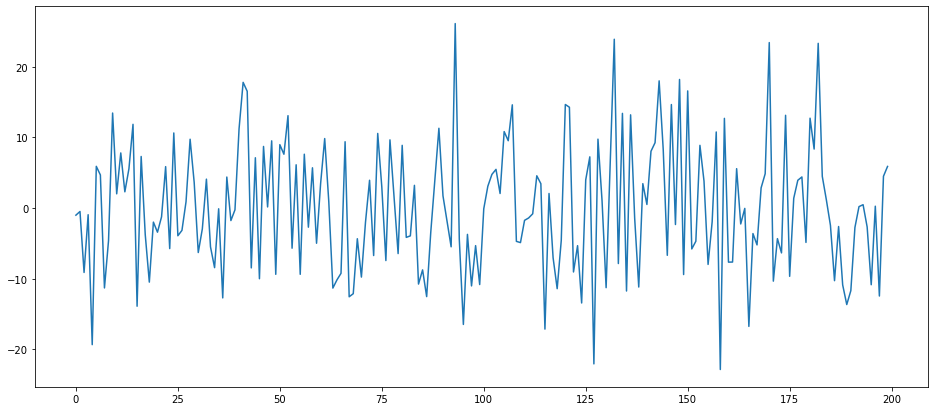

In [37]:
plt.figure(figsize=(16, 7))
plt.plot(epsilon)

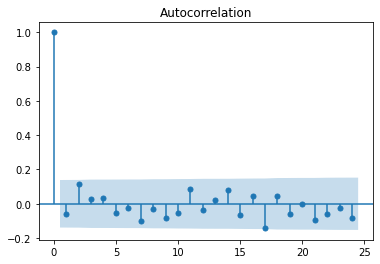

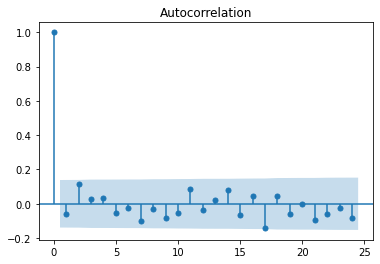

In [38]:
plot_acf(epsilon)

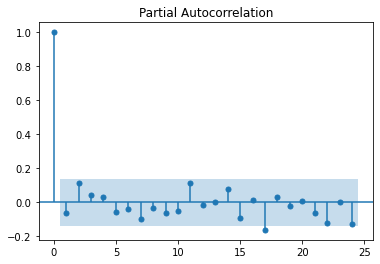

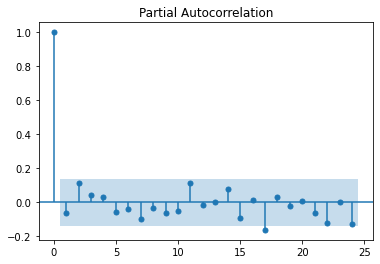

In [39]:
plot_pacf(epsilon)